In [3]:
from sklearn.datasets import load_iris
from sklearn.pipeline  import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, loss="hinge", random_state=42))

svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [4]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [5]:
svm_clf.decision_function(X_new)

array([ 0.68560988, -0.40718623])

In [6]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Device count: {torch.cuda.device_count()}")
    print(f"Current device: {torch.cuda.current_device()}")
    print(f"Device name: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    print("CUDA is not available.")

PyTorch version: 2.6.0+cu126
CUDA available: True
CUDA version: 12.6
Device count: 1
Current device: 0
Device name: NVIDIA GeForce RTX 4060 Laptop GPU


In [11]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(StandardScaler(), PolynomialFeatures(degree=3), LinearSVC(C=10, random_state=42))
polynomial_svm_clf.fit(X, y)




Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearsvc', LinearSVC(C=10, random_state=42))])

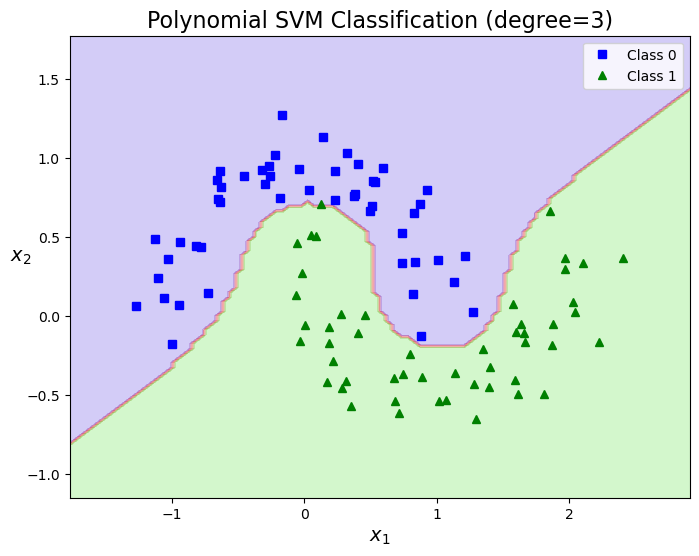

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC

# 1. 데이터 생성 및 모델 학습 (기존 코드)
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=3),
    LinearSVC(C=10, max_iter=10000, random_state=42) # max_iter 추가 (수렴 경고 방지)
)
polynomial_svm_clf.fit(X, y)

# 2. 시각화를 위한 함수 정의 (결정 경계 그리기)
def plot_decision_boundary(clf, X, y, axes):
    # 특성 공간을 덮는 그리드 생성
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]

    # 그리드의 모든 점에 대해 예측 수행
    y_pred = clf.predict(X_new).reshape(x0.shape)

    # 결정 경계 그리기 (등고선 플롯)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

    # 원본 데이터 포인트 그리기
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Class 0") # 파란색 사각형
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Class 1") # 녹색 삼각형
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
    plt.legend()

# 3. 시각화 실행
# 그래프 축 범위 설정 (데이터 범위보다 약간 넓게)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(figsize=(8, 6))
plot_decision_boundary(polynomial_svm_clf, X, y, [x_min, x_max, y_min, y_max])
plt.title("Polynomial SVM Classification (degree=3)", fontsize=16)
plt.show()

In [13]:
from sklearn.svm import SVC 

poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, coef0=1, C=5))

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [6]:
 1000000000000000/(50*365*24*60*60)

634195.8396752917